# 互评作业2: 频繁模式与关联规则挖掘

3120190981 陈雨馨 数据集：Consumer & Visitor Insights For Neighborhoods

通过对社区访问者喜欢去的商店进行分析，得到社区中最受欢迎的品牌，以及不同品牌之间的相关性。

In [1]:
import numpy as np
import pandas as pd
import apyori
from apyori import apriori
data = pd.read_csv("E:/DataMining/hw1/visit-patterns-by-census-block-group/cbg_patterns.csv")

In [2]:
data = data.drop_duplicates()
data = data.dropna()
data.head()

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


## 对数据集进行处理，转换成适合进行关联规则挖掘的形式

In [3]:
data = data[~data['related_same_day_brand'].isin(["[]"])]
daybrand = [i.lstrip('[').rstrip(']').split(",") for i in data["related_same_day_brand"]]

由于数据较多，在此仅展示前十个数据

In [4]:
daybrand[0:9]

[['"Chick-fil-A"', '"mcdonalds"', '"Marathon Petroleum"', '"walmart"'],
 ['"Shell Oil"', '"mcdonalds"', '"Chick-fil-A"', '"Chevron"'],
 ['"Dollar General"'],
 ['"Chick-fil-A"', '"Sam\'s Club"', '"Dollar General"', '"walmart"'],
 ['"Chevron"', '"Daylight Donuts"', '"walmart"'],
 ['"walmart"'],
 ['"walmart"', '"Chick-fil-A"'],
 ['"The American Legion"', '"Dollar General"', '"Jack\'s Family Restaurants"'],
 ['"Papa Murphy\'s"', '"starbucks"', '"Holiday Station"']]

## 找出频繁模式和关联规则

In [5]:
from efficient_apriori import apriori as ap2
min_supp = 0.01  #设定最小支持度
min_conf = 0.01  #设定最小置信度
min_lift = 0.0  #设定最小提升度
# 调用apriori方法，在这里不满足最小支持度、置信度和提升度的项集以及规则会被自动排除
itemsets, rules = ap2(transactions=list(daybrand),min_support=0.01, 
           min_confidence=0.01)

### 频繁模式

In [6]:
itemsets

{1: {('"Marathon Petroleum"',): 5988,
  ('"mcdonalds"',): 46447,
  ('"walmart"',): 43333,
  ('"Chick-fil-A"',): 8908,
  ('"Shell Oil"',): 12626,
  ('"Chevron"',): 7416,
  ('"Dollar General"',): 17782,
  ('"Holiday Station"',): 3698,
  ('"starbucks"',): 13620,
  ('"ConocoPhillips"',): 2601,
  ('"SUBWAY"',): 7264,
  ('"QuikTrip"',): 9951,
  ('"Circle K Stores"',): 8561,
  ('"Pilot Travel Centers"',): 8523,
  ('"ARCO"',): 2644,
  ('"Love\'s Travel Stops and Country Stores"',): 3641,
  ('"Sonic"',): 10197,
  ('"Valero Energy"',): 2776,
  ('"Dollar Tree"',): 3314,
  ('"Costco Wholesale Corp."',): 4101,
  ('"7-Eleven US"',): 9265,
  ('"Safeway"',): 4561,
  ('"Target"',): 3997,
  ('"Stop & Shop"',): 2891,
  ('"Dunkin\' Donuts"',): 20971,
  ('"Publix Super Markets"',): 5194,
  ('"Family Dollar Stores"',): 8139,
  ('"Exxon Mobil"',): 6829,
  ('"Wawa"',): 9163,
  ('"BP"',): 6263,
  ('"Wendy\'s"',): 1946,
  ('"Kroger"',): 7409,
  ('"Walgreens"',): 2612,
  ('"Casey\'s General Stores"',): 9203,
  (

### 关联规则

In [7]:
rules

[{"mcdonalds"} -> {"Chick-fil-A"},
 {"Chick-fil-A"} -> {"mcdonalds"},
 {"walmart"} -> {"Chick-fil-A"},
 {"Chick-fil-A"} -> {"walmart"},
 {"mcdonalds"} -> {"Marathon Petroleum"},
 {"Marathon Petroleum"} -> {"mcdonalds"},
 {"walmart"} -> {"Marathon Petroleum"},
 {"Marathon Petroleum"} -> {"walmart"},
 {"walmart"} -> {"mcdonalds"},
 {"mcdonalds"} -> {"walmart"},
 {"mcdonalds"} -> {"Shell Oil"},
 {"Shell Oil"} -> {"mcdonalds"},
 {"walmart"} -> {"Dollar General"},
 {"Dollar General"} -> {"walmart"},
 {"walmart"} -> {"Chevron"},
 {"Chevron"} -> {"walmart"},
 {"mcdonalds"} -> {"SUBWAY"},
 {"SUBWAY"} -> {"mcdonalds"},
 {"QuikTrip"} -> {"Circle K Stores"},
 {"Circle K Stores"} -> {"QuikTrip"},
 {"walmart"} -> {"Circle K Stores"},
 {"Circle K Stores"} -> {"walmart"},
 {"walmart"} -> {"QuikTrip"},
 {"QuikTrip"} -> {"walmart"},
 {"Shell Oil"} -> {"Pilot Travel Centers"},
 {"Pilot Travel Centers"} -> {"Shell Oil"},
 {"mcdonalds"} -> {"Circle K Stores"},
 {"Circle K Stores"} -> {"mcdonalds"},
 {"mcd

## 计算支持度和置信度以及指标LIFT

In [8]:
min_supp = 0.01  #设定最小支持度
min_conf = 0.0  #设定最小置信度
min_lift = 0.0  #设定最小提升度
# 调用apriori方法，在这里不满足最小支持度、置信度和提升度的项集以及规则会被自动排除
ap = list(apriori(transactions=list(daybrand), min_support=min_supp, 
           min_confidence=min_conf))  

In [9]:
#支持度（support），先输入空列表，再进行赋值
supports=[]
#置信度
confidences=[]
#提升度
lifts=[]
#基于项items_base
bases=[]
#推导项items_add
adds=[]

for r in ap:
    for x in r.ordered_statistics:
        if len(x.items_base)>0:
            supports.append(r.support)
            confidences.append(x.confidence)
            lifts.append(x.lift)
            bases.append(x.items_base)
            adds.append(x.items_add)

#将结果存储为dataframe
result = pd.DataFrame({
    'support':supports,
    'confidence':confidences,
    'lift':lifts,
    'base':bases,
    'add':adds
})

result

,support,confidence,lift,base,add
0,0.015341,0.453457,1.807325,"(""BP"")","(""mcdonalds"")"
1,0.015341,0.061145,1.807325,"(""mcdonalds"")","(""BP"")"
2,0.012602,0.253504,2.639142,"(""Casey's General Stores"")","(""Dollar General"")"
3,0.012602,0.131200,2.639142,"(""Dollar General"")","(""Casey's General Stores"")"
4,0.010399,0.209171,13.166317,"(""Casey's General Stores"")","(""Hy-Vee"")"
...,...,...,...,...,...
123,0.017999,0.071738,1.769281,"(""mcdonalds"")","(""Sonic"", ""walmart"")"
124,0.017999,0.076893,3.544464,"(""walmart"")","(""mcdonalds"", ""Sonic"")"
125,0.017999,0.829681,3.544464,"(""mcdonalds"", ""Sonic"")","(""walmart"")"
126,0.017999,0.443912,1.769281,"(""Sonic"", ""walmart"")","(""mcdonalds"")"


### 计算卡方指标

In [10]:
from  scipy import stats
import math
contingency_table = pd.crosstab(
    result['base'],
    result['add'],
    margins = True
)
contingency_table.head()

add,"(""mcdonalds"")","(""Love's Travel Stops and Country Stores"")","(""Meijer"")","(""Phillips 66"")","(""SUBWAY"")","(""Sheetz"")","(""Whataburger"")","(""mcdonalds"", ""walmart"")","(""Casey's General Stores"", ""walmart"")","(""mcdonalds"", ""Casey's General Stores"")",...,"(""Circle K Stores"")","(""Marathon Petroleum"")","(""Shell Oil"")","(""Sonic"")","(""Stop & Shop"")","(""Dunkin' Donuts"")","(""Exxon Mobil"")","(""Speedway"")","(""mcdonalds"", ""Sonic"")",All
base,,,,,,,,,,,,,,,,,,,,,
"(""BP"")",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"(""Pilot Travel Centers"")",1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,5
"(""Meijer"")",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"(""Phillips 66"")",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
"(""SUBWAY"")",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [11]:
kf_data=np.array([contingency_table.iloc[0].values])
for i in range(1,len(contingency_table)):
    kf_data=np.insert(kf_data,[i], values = contingency_table.iloc[i].values,axis=0)
kf_data

array([[  1,   0,   0, ...,   0,   0,   1],
       [  1,   1,   0, ...,   0,   0,   5],
       [  1,   0,   0, ...,   0,   0,   1],
       ...,
       [  1,   0,   0, ...,   1,   0,   2],
       [  0,   0,   0, ...,   0,   0,   1],
       [ 25,   3,   1, ...,   2,   1, 128]], dtype=int64)

In [12]:
from  scipy.stats import chi2_contingency
chi2_contingency(kf_data)

(835.6256507936508,
 1.0,
 1521,
 array([[1.953125e-01, 2.343750e-02, 7.812500e-03, ..., 1.562500e-02,
         7.812500e-03, 1.000000e+00],
        [9.765625e-01, 1.171875e-01, 3.906250e-02, ..., 7.812500e-02,
         3.906250e-02, 5.000000e+00],
        [1.953125e-01, 2.343750e-02, 7.812500e-03, ..., 1.562500e-02,
         7.812500e-03, 1.000000e+00],
        ...,
        [3.906250e-01, 4.687500e-02, 1.562500e-02, ..., 3.125000e-02,
         1.562500e-02, 2.000000e+00],
        [1.953125e-01, 2.343750e-02, 7.812500e-03, ..., 1.562500e-02,
         7.812500e-03, 1.000000e+00],
        [2.500000e+01, 3.000000e+00, 1.000000e+00, ..., 2.000000e+00,
         1.000000e+00, 1.280000e+02]]))

## 对挖掘结果进行可视化

### 不同关联规则的支持度、置信度和提升度盒图

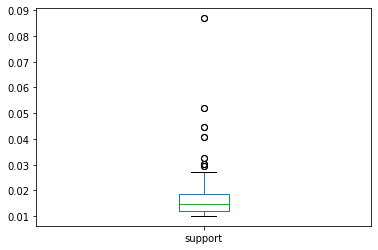

In [13]:
result['support'].plot(kind='box')

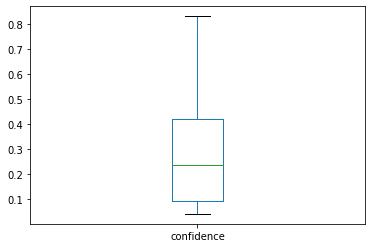

In [14]:
result['confidence'].plot(kind='box')

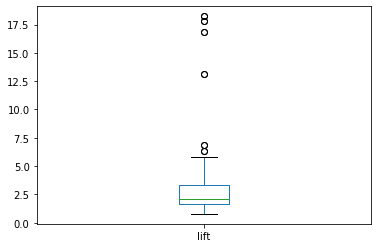

In [15]:
result['lift'].plot(kind='box')

### 前十个最受欢迎品牌柱状图

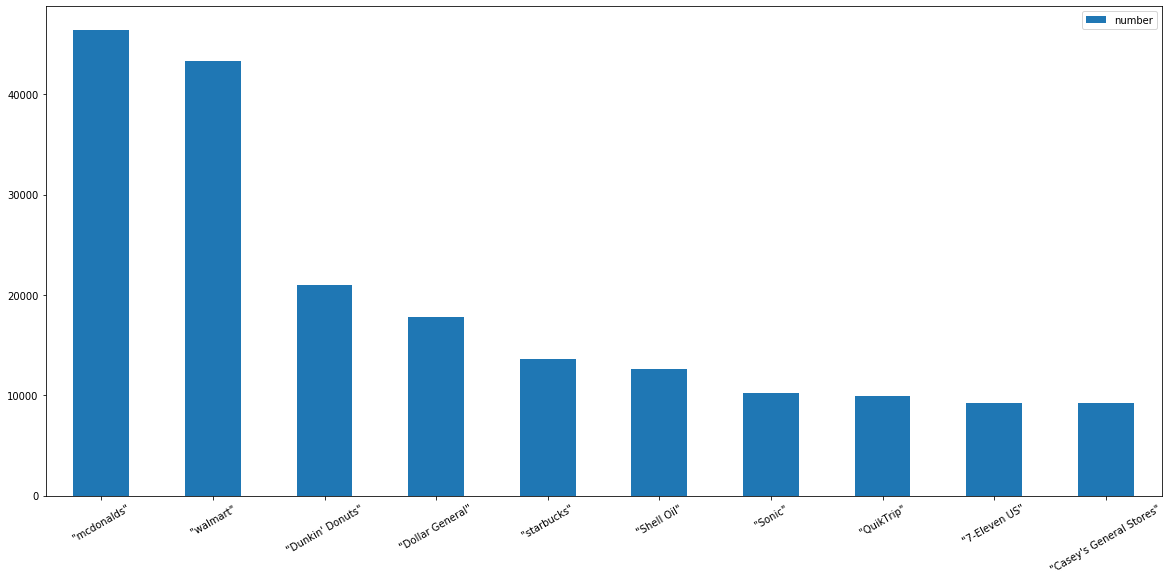

In [16]:
df = pd.DataFrame(pd.Series(itemsets.get(1)), columns=['number'])
df = df.reset_index().rename(columns={'index':'brand'})
df = df.sort_values(by=['number'],ascending=False)
ax = df[0:10].plot(kind='bar', figsize=(20,9))
t = ax.set_xticklabels(df['level_0'],rotation=30)

通过分析发现最受欢迎的品牌是快餐和商超，并且喜欢去快餐店的消费者同时也十分喜欢去商超购物。